# 2. Filtreler ve Konvolüsyon İşlemi

---

### a. Konvolüsyon Nedir? Neden Önemlidir?

**Konvolüsyon (Convolution)**, görüntü işlemede en temel ve güçlü işlemlerden biridir. Bu işlem sayesinde bilgisayarlar bir görüntüdeki **kenarlar**, **doku**, **açılar** ve **şekiller** gibi temel görsel özellikleri otomatik olarak çıkarabilir.

Konvolüsyon, bir **filtre (kernel)** ile görüntü matrisi arasında yapılan kayan bir çarpım-toplam işlemidir. Bu işlem, görüntüde belirli desenleri vurgulamak veya bastırmak için kullanılır.

> 🎯 Temel Amaç: Görüntüdeki özellikleri (features) ortaya çıkarmak. Örneğin: "Bu bir köşedir", "Bu dikey bir çizgidir".
> 

---

### b. Filtre (Kernel): Görüntü Üzerinde Kayan Küçük Matris

Bir **filtre (veya çekirdek/kernel)**, genellikle 3x3 veya 5x5 boyutlarında küçük bir sayı matrisidir. Bu matris, görüntü üzerinde satır satır, piksel piksel kayarak ilerler ve her konumda aşağıdaki işlemi yapar:

1. Filtre ile üst üste gelen pikseller ile filtre değerleri çarpılır.
2. Elde edilen tüm çarpımlar toplanır.
3. Bu toplam, yeni görüntüdeki karşılık gelen pikselin değeri olur.

Bu işlem, **konvolüsyon işlemi** olarak adlandırılır.

---



İşte bu noktada **konvolüsyon filtreleri** devreye girer. Örneğin:

- **Prewitt**, **Sobel**, **Laplacian** gibi filtreler kenar tespiti için özel olarak tasarlanmıştır.

---

### d. Temel Filtre Türleri ve Etkileri

Aşağıda yaygın filtre türleri ve etkileri açıklanmıştır:

| Filtre Türü | Etkisi | Açıklama |
| --- | --- | --- |
| **Kenar Tespiti (Edge Detection)** | Kenarları vurgular | Dikey, yatay veya köşegen kenarları belirler. |
| **Bulanıklaştırma (Blurring)** | Görüntüyü yumuşatır | Gürültüyü azaltır, ayrıntıları azaltır. |
| **Keskinleştirme (Sharpening)** | Detayları artırır | Kenarları daha belirgin hale getirir. |



## Edge Detection

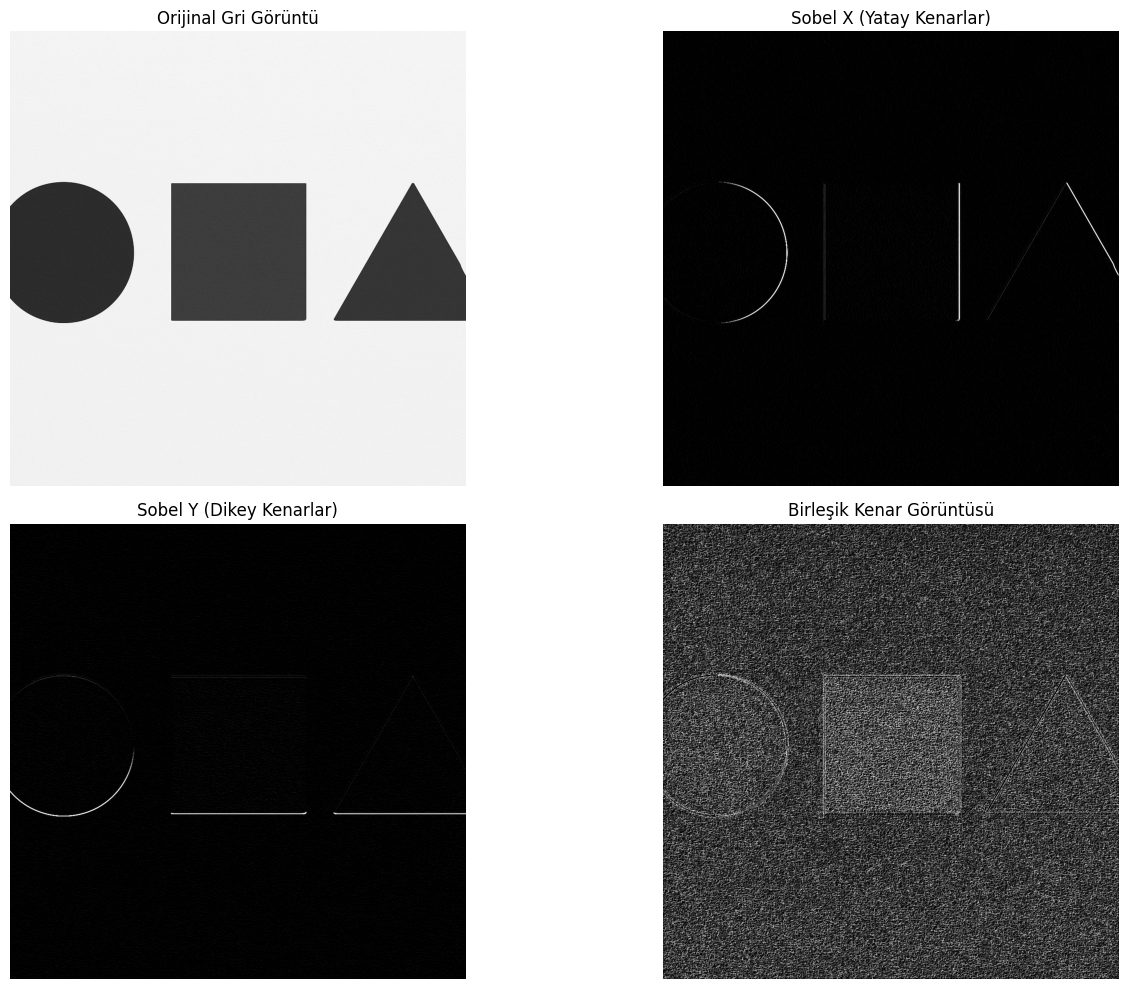

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Görüntüyü yükle ve gri tonlamaya çevir
image_bgr = cv2.imread('ornek_resim.png')
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# 2. Kenar tespiti için Sobel X filtresi (yatay kenarlar)
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

# 3. Konvolüsyon işlemini uygula (cv2.filter2D kullanılır)
# -1: çıkış kanal sayısı (girişle aynı)
convolved_x = cv2.filter2D(image_gray, -1, sobel_x)

# 4. Yatay kenarlar için Sobel Y filtresi
sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

convolved_y = cv2.filter2D(image_gray, -1, sobel_y)

# 5. Her iki yöndeki kenarları birleştir (genlik hesaplama)
# Karelerin toplamının karekökü → gerçek kenar şiddeti
edges = np.sqrt(convolved_x**2 + convolved_y**2)
edges = np.uint8(edges)  # Sonucu 8 bit tamsayıya çevir

# 6. Sonuçları görselleştir
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Orijinal Gri Görüntü")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(convolved_x, cmap='gray')
plt.title("Sobel X (Yatay Kenarlar)")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(convolved_y, cmap='gray')
plt.title("Sobel Y (Dikey Kenarlar)")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(edges, cmap='gray')
plt.title("Birleşik Kenar Görüntüsü")
plt.axis('off')

plt.tight_layout()
plt.show()


## Bulanıklaştırma - Blurring

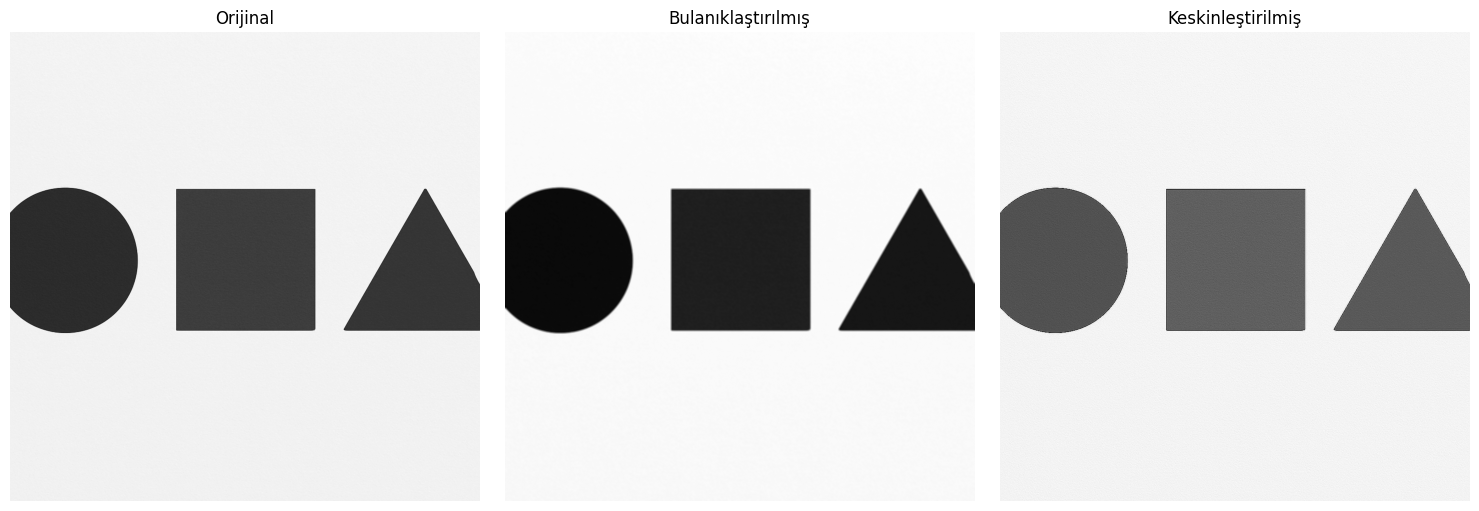

In [2]:
# Bulanıklaştırma filtresi (Box Filter)
blur_kernel = np.ones((5, 5), np.float32) / 25
blurred = cv2.filter2D(image_gray, -1, blur_kernel)

# Keskinleştirme filtresi
sharpen_kernel = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])
sharpened = cv2.filter2D(image_gray, -1, sharpen_kernel)

# Karşılaştırma
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title("Orijinal")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blurred, cmap='gray')
plt.title("Bulanıklaştırılmış")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened, cmap='gray')
plt.title("Keskinleştirilmiş")
plt.axis('off')

plt.tight_layout()
plt.show()
